In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv(r'D:\sklearn-data\kmeans\air_data.csv',index_col=0)
data.shape

(62988, 43)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62988 entries, 54993 to 61340
Data columns (total 43 columns):
FFP_DATE                   62988 non-null object
FIRST_FLIGHT_DATE          62988 non-null object
GENDER                     62985 non-null object
FFP_TIER                   62988 non-null int64
WORK_CITY                  60719 non-null object
WORK_PROVINCE              59740 non-null object
WORK_COUNTRY               62962 non-null object
AGE                        62568 non-null float64
LOAD_TIME                  62988 non-null object
FLIGHT_COUNT               62988 non-null int64
BP_SUM                     62988 non-null int64
EP_SUM_YR_1                62988 non-null int64
EP_SUM_YR_2                62988 non-null int64
SUM_YR_1                   62437 non-null float64
SUM_YR_2                   62850 non-null float64
SEG_KM_SUM                 62988 non-null int64
WEIGHTED_SEG_KM            62988 non-null float64
LAST_FLIGHT_DATE           62988 non-null object
AVG_FLI

work_city,work_province,work_country,sun_yr_1,sum_yr_2存在缺失值，其中work_city,work_province,work_country的缺失对建模无影响，故不做处理，sun_yr_1,sum_yr_2的缺失值数量很少，可以将缺失值样本删除。

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFP_TIER,62988.0,4.102162,0.373856,4.00,4.000000,4.000000,4.000000,6.000000
AGE,62568.0,42.476346,9.885915,6.00,35.000000,41.000000,48.000000,110.000000
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.00,3.000000,7.000000,15.000000,213.000000
BP_SUM,62988.0,10925.081254,16339.486151,0.00,2518.000000,5700.000000,12831.000000,505308.000000
EP_SUM_YR_1,62988.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
EP_SUM_YR_2,62988.0,265.689623,1645.702854,0.00,0.000000,0.000000,0.000000,74460.000000
SUM_YR_1,62437.0,5355.376064,8109.450147,0.00,1003.000000,2800.000000,6574.000000,239560.000000
SUM_YR_2,62850.0,5604.026014,8703.364247,0.00,780.000000,2773.000000,6845.750000,234188.000000
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.00,4747.000000,9994.000000,21271.250000,580717.000000
WEIGHTED_SEG_KM,62988.0,12777.152439,17578.586695,0.00,3219.045000,6978.255000,15299.632500,558440.140000


In [19]:
(data['avg_discount']==0).sum()

8

平均折扣率为0的样本共8个，可以直接删除。

In [29]:
data.dropna(axis=0,subset=['SUM_YR_1','SUM_YR_2'],inplace=True)  #删除第一年总票价和第二年总票价为空值的样本

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62299 entries, 54993 to 61027
Data columns (total 43 columns):
FFP_DATE                   62299 non-null object
FIRST_FLIGHT_DATE          62299 non-null object
GENDER                     62296 non-null object
FFP_TIER                   62299 non-null int64
WORK_CITY                  60043 non-null object
WORK_PROVINCE              59075 non-null object
WORK_COUNTRY               62273 non-null object
AGE                        61884 non-null float64
LOAD_TIME                  62299 non-null object
FLIGHT_COUNT               62299 non-null int64
BP_SUM                     62299 non-null int64
EP_SUM_YR_1                62299 non-null int64
EP_SUM_YR_2                62299 non-null int64
SUM_YR_1                   62299 non-null float64
SUM_YR_2                   62299 non-null float64
SEG_KM_SUM                 62299 non-null int64
WEIGHTED_SEG_KM            62299 non-null float64
LAST_FLIGHT_DATE           62299 non-null object
AVG_FLI

In [35]:
data=data.loc[data['avg_discount']!=0,:]   #删除平均折扣为0的样本

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62292 entries, 54993 to 22761
Data columns (total 43 columns):
FFP_DATE                   62292 non-null object
FIRST_FLIGHT_DATE          62292 non-null object
GENDER                     62289 non-null object
FFP_TIER                   62292 non-null int64
WORK_CITY                  60036 non-null object
WORK_PROVINCE              59068 non-null object
WORK_COUNTRY               62266 non-null object
AGE                        61877 non-null float64
LOAD_TIME                  62292 non-null object
FLIGHT_COUNT               62292 non-null int64
BP_SUM                     62292 non-null int64
EP_SUM_YR_1                62292 non-null int64
EP_SUM_YR_2                62292 non-null int64
SUM_YR_1                   62292 non-null float64
SUM_YR_2                   62292 non-null float64
SEG_KM_SUM                 62292 non-null int64
WEIGHTED_SEG_KM            62292 non-null float64
LAST_FLIGHT_DATE           62292 non-null object
AVG_FLI

### 提取与LRFMC模型有关联的属性

In [40]:
data.shape

(62292, 43)

In [41]:
data.index=range(data.shape[0])

In [43]:
new_data=data.loc[:,['LOAD_TIME','FFP_DATE','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]

In [44]:
new_data.head()

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2014/03/31,2006/11/02,1,210,580717,0.961639
1,2014/03/31,2007/02/19,7,140,293678,1.252314
2,2014/03/31,2007/02/01,11,135,283712,1.254676
3,2014/03/31,2008/08/22,97,23,281336,1.090870
4,2014/03/31,2009/04/10,5,152,309928,0.970658


In [51]:
new_data.shape

(62292, 6)

In [56]:
(new_data['FFP_DATE']==0).sum()

0

### 数据变化及标准化

In [120]:
import datetime
L_y=new_data['LOAD_TIME'].apply(lambda x:datetime.datetime.strptime(x,'%Y/%m/%d').year)
L_m=new_data['LOAD_TIME'].apply(lambda x:datetime.datetime.strptime(x,'%Y/%m/%d').month)
F_y=new_data['FFP_DATE'].apply(lambda x:datetime.datetime.strptime(x,'%Y/%m/%d').year)
F_m=new_data['FFP_DATE'].apply(lambda x:datetime.datetime.strptime(x,'%Y/%m/%d').month)

In [122]:
new_data['L']=(L_y-F_y)*12+(L_m-F_m)

In [123]:
new_data.head()

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount,L
0,2014/03/31,2006/11/02,1,210,580717,0.961639,88
1,2014/03/31,2007/02/19,7,140,293678,1.252314,85
2,2014/03/31,2007/02/01,11,135,283712,1.254676,85
3,2014/03/31,2008/08/22,97,23,281336,1.090870,67
4,2014/03/31,2009/04/10,5,152,309928,0.970658,59


In [125]:
new_data.drop(['LOAD_TIME','FFP_DATE'],axis=1,inplace=True)

In [126]:
new_data.columns

Index(['LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount', 'L'], dtype='object')

In [127]:
new_data.columns=['R','F','M','C','L']

In [128]:
new_data.head()

,R,F,M,C,L
0,1,210,580717,0.961639,88
1,7,140,293678,1.252314,85
2,11,135,283712,1.254676,85
3,97,23,281336,1.090870,67
4,5,152,309928,0.970658,59


In [131]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62292 entries, 0 to 62291
Data columns (total 5 columns):
R    62292 non-null int64
F    62292 non-null int64
M    62292 non-null int64
C    62292 non-null float64
L    62292 non-null int64
dtypes: float64(1), int64(4)
memory usage: 2.4 MB


#### 标准化

In [130]:
from sklearn.preprocessing import StandardScaler
std_data=StandardScaler().fit_transform(new_data)

C:\Users\zhuxi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\zhuxi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [134]:
std_data=pd.DataFrame(std_data)

In [140]:
std_data.columns=new_data.columns
std_data.head()

,R,F,M,C,L
0,-0.947618,14.054669,26.798874,1.296485,1.422231
1,-0.914518,9.087297,13.146445,2.868708,1.314488
2,-0.892451,8.732484,12.672433,2.881479,1.314488
3,-0.418022,0.784689,12.559423,1.995475,0.668028
4,-0.925551,9.938846,13.919344,1.345267,0.380713


### 建模

In [141]:
k=5
clu=KMeans(n_clusters=k,n_jobs=-1)
clu.fit(std_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [143]:
clu.cluster_centers_    #5个质心

array([[-0.41366602, -0.16075325, -0.16072417, -0.25534727, -0.69931802],
       [ 1.68472785, -0.57301862, -0.53585064, -0.17314272, -0.31609615],
       [-0.37561634, -0.08750614, -0.09529297, -0.15535831,  1.16189549],
       [-0.00289974, -0.22766244, -0.2315066 ,  2.18969116,  0.05303377],
       [-0.8017166 ,  2.4866597 ,  2.42803224,  0.3103803 ,  0.4851702 ]])

In [167]:
result=pd.DataFrame(clu.cluster_centers_)

In [168]:
result.columns=new_data.columns

In [144]:
clu.labels_

array([4, 4, 4, ..., 0, 1, 1])

In [170]:
a=pd.DataFrame(pd.Series(clu.labels_).value_counts()).sort_index()
a.columns=['NumOClusters']

In [171]:
results=pd.concat([result,a],axis=1)
results

,R,F,M,C,L,NumOClusters
0,-0.413666,-0.160753,-0.160724,-0.255347,-0.699318,24784
1,1.684728,-0.573019,-0.535851,-0.173143,-0.316096,12158
2,-0.375616,-0.087506,-0.095293,-0.155358,1.161895,15804
3,-0.002900,-0.227662,-0.231507,2.189691,0.053034,4205
4,-0.801717,2.486660,2.428032,0.310380,0.485170,5341


In [172]:
results.index=range(1,6)
results

,R,F,M,C,L,NumOClusters
1,-0.413666,-0.160753,-0.160724,-0.255347,-0.699318,24784
2,1.684728,-0.573019,-0.535851,-0.173143,-0.316096,12158
3,-0.375616,-0.087506,-0.095293,-0.155358,1.161895,15804
4,-0.002900,-0.227662,-0.231507,2.189691,0.053034,4205
5,-0.801717,2.486660,2.428032,0.310380,0.485170,5341


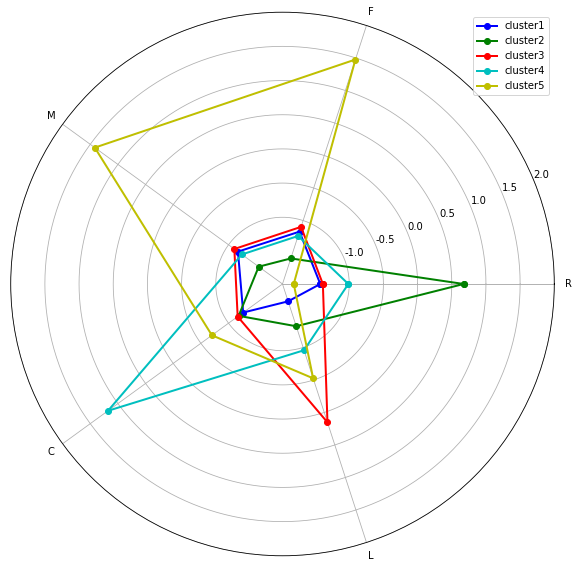

In [177]:
labels = new_data.columns #标签
k = 5 #数据个数
plot_data = clu.cluster_centers_
color = ['b', 'g', 'r', 'c', 'y'] #指定颜色

angles = np.linspace(0, 2*np.pi, k, endpoint=False)
plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) # 闭合
angles = np.concatenate((angles, [angles[0]])) # 闭合

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar=True)      #polar参数 
for i in range(len(plot_data)):
  ax.plot(angles, plot_data[i], 'o-', color = color[i], label = 'cluster'+str(i+1), linewidth=2)# 画线

ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5))
ax.set_thetagrids(angles * 180/np.pi, labels)
plt.legend(loc =0)
plt.show()